<h1>Análise de dados - Pokemon</h1>

![title](https://trecobox.com.br/wp-content/uploads/2018/10/pokemon-go-sept-revenue.jpg)

Dicas: 
https://www.kaggle.com/ash316/learn-pandas-with-pokemons

In [1]:
#Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Lendo o dataset
pk = pd.read_csv('dataset\Pokemon.csv')

In [3]:
#Verifica informações sobre o dataset.
pk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 66.4+ KB


Podemos observar que o campo Type 2 possui valores nulos (386 para ser exato)

In [4]:
pk.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Podemos observar também que, quando um pokemon possui uma mega evolução ele vem repetindo o nome do pokemon junto da palavra mega. 

Ex: VenusaurMega Venusaur

<h3>Limpando os dados e removendo os valores nulos</h3>

In [5]:
#Alterando o nome das colunas para maiusculo
pk.columns = pk.columns.str.upper()

In [6]:
#Limpando o nome do pokemon que aparece antes da palavra MEGA
pk['NAME'] = pk['NAME'].str.replace(".*(?=Mega)", "")
# The name of Mega Pokemons contained extra and unneeded text. Removed all the text before "Mega" 

In [7]:
#Preenchendo os tipos vazios com o mesmo valor do tipo 1
pk['TYPE 2'] = pk['TYPE 2'].fillna(pk['TYPE 1'])

In [8]:
#Verifica informações sobre o dataset
pk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
NAME          800 non-null object
TYPE 1        800 non-null object
TYPE 2        800 non-null object
TOTAL         800 non-null int64
HP            800 non-null int64
ATTACK        800 non-null int64
DEFENSE       800 non-null int64
SP. ATK       800 non-null int64
SP. DEF       800 non-null int64
SPEED         800 non-null int64
GENERATION    800 non-null int64
LEGENDARY     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 66.4+ KB


Aqui podemos ver que não possuimos mais os valores nulos

In [9]:
pk.head()

,#,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False


E corrigimos o erro que repetia o nome do pokemon na palavra mega

<h3>Exibindo dados de pokemons lendarios</h3>

In [10]:
#Agrupa os pokemons lendarios e ordenando por geração
pkl = pk[pk['LEGENDARY'] == True].groupby(['GENERATION','#','NAME'])

In [11]:
#Exibe os pokemons lendarios por geração e o seu tipo
pkl[['TYPE 1','TYPE 2']].first()

TYPE 1    TYPE 2
GENERATION #   NAME                                        
1          144 Articuno                       Ice    Flying
           145 Zapdos                    Electric    Flying
           146 Moltres                       Fire    Flying
           150 Mega Mewtwo X              Psychic  Fighting
               Mega Mewtwo Y              Psychic   Psychic
               Mewtwo                     Psychic   Psychic
2          243 Raikou                    Electric  Electric
           244 Entei                         Fire      Fire
           245 Suicune                      Water     Water
           249 Lugia                      Psychic    Flying
           250 Ho-oh                         Fire    Flying
3          377 Regirock                      Rock      Rock
           378 Regice                         Ice       Ice
           379 Registeel                    Steel     Steel
           380 Latias                      Dragon   Psychic
               Mega Latias                 Dragon   Psychic
           381 Latios                      Dragon   Psychic
               Mega Latios                 Dragon   Psychic
           382 Kyogre                       Water     Water
               KyogrePrimal Kyogre          Water     Water
           383 Groudon                     Ground    Ground
               GroudonPrimal Groudon       Ground      Fire
           384 Mega Rayquaza               Dragon    Flying
               Rayquaza                    Dragon    Flying
           385 Jirachi                      Steel   Psychic
           386 DeoxysAttack Forme         Psychic   Psychic
               DeoxysDefense Forme        Psychic   Psychic
               DeoxysNormal Forme         Psychic   Psychic
               DeoxysSpeed Forme          Psychic   Psychic
4          480 Uxie                       Psychic   Psychic
...                                           ...       ...
           486 Regigigas                   Normal    Normal
           487 GiratinaAltered Forme        Ghost    Dragon
               GiratinaOrigin Forme         Ghost    Dragon
           491 Darkrai                       Dark      Dark
           492 ShayminLand Forme            Grass     Grass
               ShayminSky Forme             Grass    Flying
           493 Arceus                      Normal    Normal
5          494 Victini                    Psychic      Fire
           638 Cobalion                     Steel  Fighting
           639 Terrakion                     Rock  Fighting
           640 Virizion                     Grass  Fighting
           641 TornadusIncarnate Forme     Flying    Flying
               TornadusTherian Forme       Flying    Flying
           642 ThundurusIncarnate Forme  Electric    Flying
               ThundurusTherian Forme    Electric    Flying
           643 Reshiram                    Dragon      Fire
           644 Zekrom                      Dragon  Electric
           645 LandorusIncarnate Forme     Ground    Flying
               LandorusTherian Forme       Ground    Flying
           646 Kyurem                      Dragon       Ice
               KyuremBlack Kyurem          Dragon       Ice
               KyuremWhite Kyurem          Dragon       Ice
6          716 Xerneas                      Fairy     Fairy
           717 Yveltal                       Dark    Flying
           718 Zygarde50% Forme            Dragon    Ground
           719 Diancie                       Rock     Fairy
               Mega Diancie                  Rock     Fairy
           720 HoopaHoopa Confined        Psychic     Ghost
               HoopaHoopa Unbound         Psychic      Dark
           721 Volcanion                     Fire     Water

[65 rows x 2 columns]

In [12]:
poder_total_lendario = pk[pk['LEGENDARY'] == True]
poder_total_lendario[poder_total_lendario['TOTAL'].max() == poder_total_lendario['TOTAL']]

,#,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
163,150,Mega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
164,150,Mega Mewtwo Y,Psychic,Psychic,780,106,150,70,194,120,140,1,True
426,384,Mega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True


![title](img/mega m2.jpg)
![title](img/mega r.jpg)

Filtrando por poder TOTAL, ele nos mostra os 3 pokemons com a maior pontuação, que são Mega Mewtwo X, Mega Mewtwo X e Mega Rayquaza	

In [13]:
poder_total_lendario = pk[pk['LEGENDARY'] == True].sort_values(by='TOTAL',ascending=False)

In [18]:
lendarios_tipo = poder_total_lendario.drop_duplicates(subset=['TYPE 1'],keep='first')

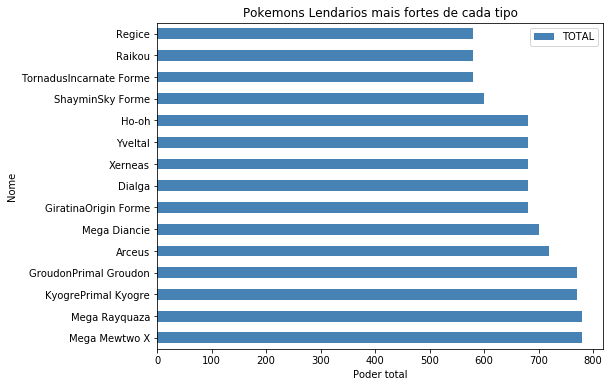

In [15]:
lendarios_tipo.plot(x='NAME', y='TOTAL',kind='barh',figsize=(8,6),color='#4682B4')
plt.title('Pokemons Lendarios mais fortes de cada tipo')
plt.ylabel("Nome")
plt.xlabel("Poder total")
plt.show()

In [90]:
#sns.barplot(x="time", y="tip", data=tips, order=["Dinner", "Lunch"])
pk_max = pk[pk['TOTAL'].max() == pk['TOTAL']].iloc[0]
pk_min = pk[pk['TOTAL'].min() == pk['TOTAL']].iloc[0]

ValueError: x and y must have same first dimension, but have shapes (2, 13) and (800,)

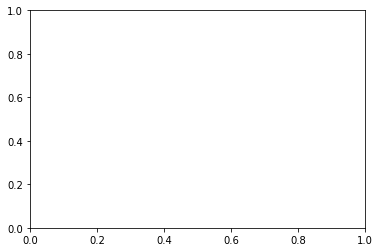

In [94]:
plt.plot([pk_max,pk_min],pk['TOTAL'])